# Lecture 21

## Applying Monte Carlo Methods to the Ising Model

The Ising model is a fundamental model in statistical physics used to study phase transitions and collective behaviour in magnetic systems. It consists of a lattice of spins $s_i = \pm 1$, where each spin interacts with its nearest neighbours. The energy of a spin configuration is given by the Hamiltonian

$E = -J \sum_{\langle i, j \rangle} s_i s_j$ (without magnetic term)

where $J$ is the coupling constant (taken as $J = 1$ here), and the sum runs over all nearest-neighbour pairs. Here, the Metropolis Monte Carlo algorithm has been used to evolve a 2D lattice of spins toward thermal equilibrium (low energy configuration) at a given temperature $T$ (in units where $k_B = 1$). At each step, individual spins are randomly selected and flipped with a probability determined by the resulting change in energy. This process mimics thermal fluctuations and allows the system to explore its phase space (similar to the final project on TSP using simulated annealing where we explored the space for various path to arrive at the shortest path. Code can be found here: https://github.com/LoopyNoodle/TSP-with-Simulated-Annealing). By visualising the lattice before and after the simulation, we observe how temperature influences the degree of spin alignment, with ordered phases emerging below the critical temperature $T_c \approx 2.27$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def metropolis(spins, T):
    for i in range(N * N):
        x = np.random.randint(0, N)
        y = np.random.randint(0, N)
        
        # applying periodic boundary conditions
        neighbours = spins[(x + 1) % N, y] + spins[x, (y + 1) % N] + spins[(x - 1) % N, y] + spins[x, (y - 1) % N]
        dE = 2 * spins[x, y] * neighbours

        # metropolis criterion
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            spins[x, y] *= -1
    return spins

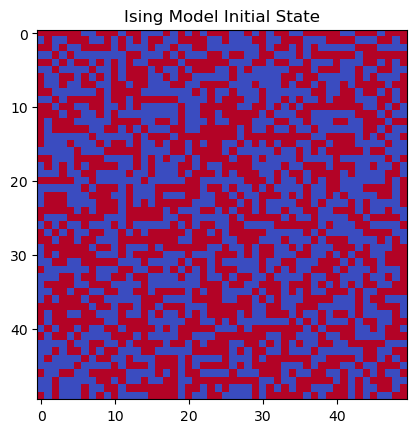

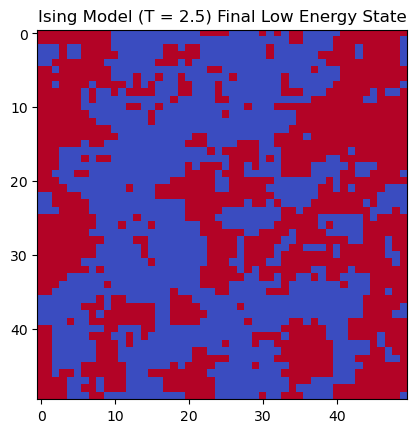

In [16]:
N = 50              
T = 2.5 # temperature (dim-less as J/k_B)
n_steps = 1000

spins = np.random.choice([-1, 1], size = (N, N)) # spins randomly set to +1 or -1
initial = spins.copy()

for i in range(n_steps):
    spins = metropolis(spins, T)

plt.imshow(initial, cmap = 'coolwarm', interpolation = 'nearest')
plt.title('Ising Model Initial State')

plt.figure()
plt.imshow(spins, cmap = 'coolwarm', interpolation = 'nearest')
plt.title(f'Ising Model (T = {T}) Final Low Energy State')
plt.show()